In [1]:
from numpy import mean
from numpy import std
from numpy import dstack
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import *
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [3]:
s25 = np.load('s25.npy')
h25 = np.load('h25.npy')

In [4]:
s25_labels = np.array([0 for _ in range(0,len(s25))])
h25_labels = np.array([1 for _ in range(0,len(h25))])

In [5]:
X = np.append(s25,h25,axis=0)

In [6]:
y = np.append(s25_labels,h25_labels,axis=0)

In [7]:
X.shape

(1142, 6250, 19)

In [8]:
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 10, 32
    n_timesteps, n_features = trainX.shape[1], trainX.shape[2]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation= 'relu' ))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation= 'sigmoid' ))
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy',Precision(),Recall(),AUC()])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy,precision,recall,auc = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy,precision,recall,auc

In [9]:
def summarize_results(accuracies,precisions,recalls,aucs):
    m, s = mean(accuracies), std(accuracies)
    print( ' Accuracy: %.3f%% (+/-%.3f) ' % (m, s))
    m, s = mean(precisions), std(precisions)
    print( ' Precision: %.3f%% (+/-%.3f) ' % (m, s))
    m, s = mean(recalls), std(recalls)
    print( ' Recall: %.3f%% (+/-%.3f) ' % (m, s))
    m, s = mean(aucs), std(aucs)
    print( ' AUC: %.3f%% (+/-%.3f) ' % (m, s))

In [10]:
def run_experiment(X,y,repeats=5):
    # load data
    trainX, testX,trainy, testy = train_test_split(X, y, test_size=0.20, random_state=42)
    # repeat experiment
    accuracies = list()
    precisions = list()
    recalls = list()
    aucs = list()
    for r in range(repeats):
        accuracy,precision,recall,auc = evaluate_model(trainX, trainy, testX, testy)
        accuracy = accuracy * 100.0
        precision = precision * 100.0
        recall = recall * 100.0
        auc = auc * 100.0
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        aucs.append(auc)
    # summarize results
    summarize_results(accuracies,precisions,recalls,aucs)

In [11]:
run_experiment(X,y)

Epoch 1/10
29/29 [==============================] - 4s 28ms/step - loss: 24.3454 - accuracy: 0.6123 - precision: 0.5964 - recall: 0.5350 - auc: 0.6216
Epoch 2/10
29/29 [==============================] - 1s 27ms/step - loss: 0.5978 - accuracy: 0.8817 - precision: 0.8721 - recall: 0.8762 - auc: 0.9382
Epoch 3/10
29/29 [==============================] - 1s 27ms/step - loss: 0.2298 - accuracy: 0.9419 - precision: 0.9676 - recall: 0.9065 - auc: 0.9818
Epoch 4/10
29/29 [==============================] - 1s 27ms/step - loss: 0.0938 - accuracy: 0.9704 - precision: 0.9696 - recall: 0.9673 - auc: 0.9952
Epoch 5/10
29/29 [==============================] - 1s 27ms/step - loss: 0.0343 - accuracy: 0.9945 - precision: 0.9976 - recall: 0.9907 - auc: 0.9999
Epoch 6/10
29/29 [==============================] - 1s 27ms/step - loss: 0.0434 - accuracy: 0.9945 - precision: 0.9930 - recall: 0.9953 - auc: 0.9985
Epoch 7/10
29/29 [==============================] - 1s 27ms/step - loss: 0.0176 - accuracy: 0.9989 

In [12]:
def evaluate_model_2(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 10, 32
    n_timesteps, n_features = trainX.shape[1], trainX.shape[2]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation= 'relu' ))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation= 'sigmoid' ))
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy',Precision(),Recall(),AUC()])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy,precision,recall,auc = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy,precision,recall,auc

In [13]:
def run_experiment_2(X,y,repeats=5):
    # load data
    trainX, testX,trainy, testy = train_test_split(X, y, test_size=0.20, random_state=42)
    # repeat experiment
    accuracies = list()
    precisions = list()
    recalls = list()
    aucs = list()
    for r in range(repeats):
        accuracy,precision,recall,auc = evaluate_model_2(trainX, trainy, testX, testy)
        accuracy = accuracy * 100.0
        precision = precision * 100.0
        recall = recall * 100.0
        auc = auc * 100.0
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        aucs.append(auc)
    # summarize results
    summarize_results(accuracies,precisions,recalls,aucs)

In [14]:
run_experiment_2(X,y)

Epoch 1/10
29/29 [==============================] - 1s 23ms/step - loss: 86.1107 - accuracy: 0.5192 - precision_5: 0.4807 - recall_5: 0.3201 - auc_5: 0.5213
Epoch 2/10
29/29 [==============================] - 1s 23ms/step - loss: 0.6894 - accuracy: 0.4775 - precision_5: 0.4727 - recall_5: 0.9930 - auc_5: 0.4986
Epoch 3/10
29/29 [==============================] - 1s 24ms/step - loss: 0.6897 - accuracy: 0.4721 - precision_5: 0.4703 - recall_5: 1.0000 - auc_5: 0.5090
Epoch 4/10
29/29 [==============================] - 1s 24ms/step - loss: 0.6910 - accuracy: 0.4710 - precision_5: 0.4698 - recall_5: 1.0000 - auc_5: 0.5032
Epoch 5/10
29/29 [==============================] - 1s 23ms/step - loss: 0.6909 - accuracy: 0.4874 - precision_5: 0.4554 - recall_5: 0.4766 - auc_5: 0.5032
Epoch 6/10
29/29 [==============================] - 1s 23ms/step - loss: 0.6893 - accuracy: 0.5334 - precision_5: 1.0000 - recall_5: 0.0047 - auc_5: 0.5054
Epoch 7/10
29/29 [==============================] - 1s 24ms/ste

In [15]:
def evaluate_model_3(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 10, 32
    n_timesteps, n_features = trainX.shape[1], trainX.shape[2]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation= 'relu' ))
    model.add(Dropout(0.25))
    model.add(Dense(50, activation= 'relu' ))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation= 'sigmoid' ))
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy',Precision(),Recall(),AUC()])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy,precision,recall,auc = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy,precision,recall,auc

In [16]:
def run_experiment_3(X,y,repeats=5):
    # load data
    trainX, testX,trainy, testy = train_test_split(X, y, test_size=0.20, random_state=42)
    # repeat experiment
    accuracies = list()
    precisions = list()
    recalls = list()
    aucs = list()
    for r in range(repeats):
        accuracy,precision,recall,auc = evaluate_model_3(trainX, trainy, testX, testy)
        accuracy = accuracy * 100.0
        precision = precision * 100.0
        recall = recall * 100.0
        auc = auc * 100.0
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        aucs.append(auc)
    # summarize results
    summarize_results(accuracies,precisions,recalls,aucs)

In [17]:
run_experiment_3(X,y)

Epoch 1/10
29/29 [==============================] - 1s 18ms/step - loss: 15.5640 - accuracy: 0.5936 - precision_10: 0.5798 - recall_10: 0.4836 - auc_10: 0.6076
Epoch 2/10
29/29 [==============================] - 1s 20ms/step - loss: 0.6098 - accuracy: 0.7547 - precision_10: 0.7372 - recall_10: 0.7407 - auc_10: 0.8298
Epoch 3/10
29/29 [==============================] - 1s 20ms/step - loss: 0.3374 - accuracy: 0.8598 - precision_10: 0.8488 - recall_10: 0.8528 - auc_10: 0.9322
Epoch 4/10
29/29 [==============================] - 1s 20ms/step - loss: 0.7520 - accuracy: 0.9310 - precision_10: 0.9065 - recall_10: 0.9509 - auc_10: 0.9712
Epoch 5/10
29/29 [==============================] - 1s 20ms/step - loss: 0.1136 - accuracy: 0.9573 - precision_10: 0.9687 - recall_10: 0.9393 - auc_10: 0.9938
Epoch 6/10
29/29 [==============================] - 1s 20ms/step - loss: 0.0594 - accuracy: 0.9792 - precision_10: 0.9745 - recall_10: 0.9813 - auc_10: 0.9966
Epoch 7/10
29/29 [===========================

In [7]:
n_timesteps, n_features = X.shape[1], X.shape[2]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation= 'relu' ))
model.add(Dropout(0.25))
model.add(Dense(1, activation= 'sigmoid' ))

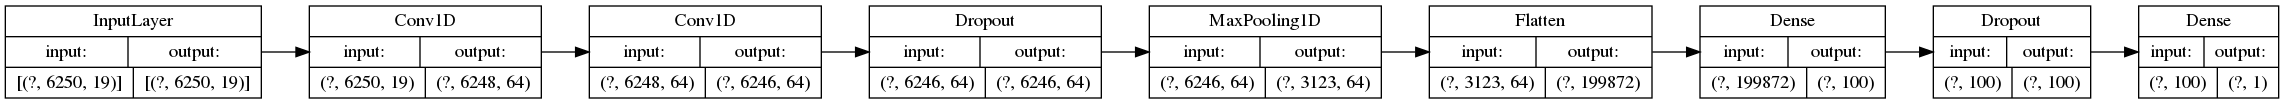

In [13]:
plot_model(model, to_file='cnn1.png', show_shapes=True, show_layer_names=False,rankdir="LR")

In [14]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation= 'relu' ))
model.add(Dropout(0.25))
model.add(Dense(1, activation= 'sigmoid' ))

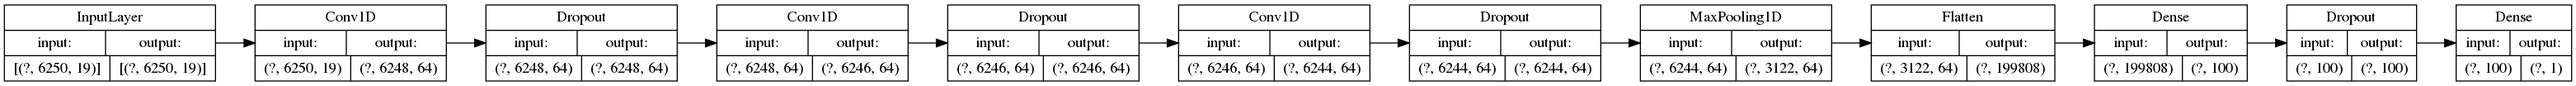

In [15]:
plot_model(model, to_file='cnn2.png', show_shapes=True, show_layer_names=False,rankdir="LR")

In [16]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation= 'relu' ))
model.add(Dropout(0.25))
model.add(Dense(50, activation= 'relu' ))
model.add(Dropout(0.25))
model.add(Dense(1, activation= 'sigmoid' ))

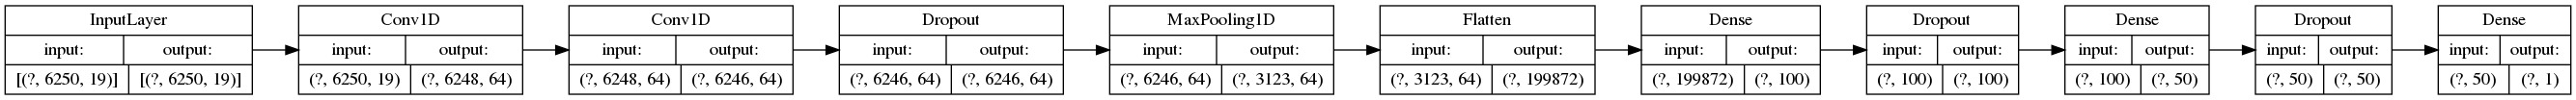

In [17]:
plot_model(model, to_file='cnn3.png', show_shapes=True, show_layer_names=False,rankdir="LR")